![NYC Skyline](nyc.jpg)

Welcome to New York City, one of the most-visited cities in the world. There are many Airbnb listings in New York City to meet the high demand for temporary lodging for travelers, which can be anywhere between a few nights to many months. In this project, we will take a closer look at the New York Airbnb market by combining data from multiple file types like `.csv`, `.tsv`, and `.xlsx`.

Recall that **CSV**, **TSV**, and **Excel** files are three common formats for storing data. 
Three files containing data on 2019 Airbnb listings are available to you:

**data/airbnb_price.csv**
This is a CSV file containing data on Airbnb listing prices and locations.
- **`listing_id`**: unique identifier of listing
- **`price`**: nightly listing price in USD
- **`nbhood_full`**: name of borough and neighborhood where listing is located

**data/airbnb_room_type.xlsx**
This is an Excel file containing data on Airbnb listing descriptions and room types.
- **`listing_id`**: unique identifier of listing
- **`description`**: listing description
- **`room_type`**: Airbnb has three types of rooms: shared rooms, private rooms, and entire homes/apartments

**data/airbnb_last_review.tsv**
This is a TSV file containing data on Airbnb host names and review dates.
- **`listing_id`**: unique identifier of listing
- **`host_name`**: name of listing host
- **`last_review`**: date when the listing was last reviewed

In [102]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Begin coding here ...
# Use as many cells as you like


In [103]:
# Loading the datasets

csv_Airbnb19 = pd.read_csv("data/airbnb_price.csv")
xlsx_Airbnb19 = pd.read_excel("data/airbnb_room_type.xlsx")
tsv_Airbnb19 = pd.read_csv("data/airbnb_last_review.tsv", delimiter = "\t")

AirBnb_2019 = csv_Airbnb19.merge(xlsx_Airbnb19, on='listing_id').merge(tsv_Airbnb19, on='listing_id')

**DataCamp**

In [104]:
# Import CSV for prices
airbnb_price = pd.read_csv('data/airbnb_price.csv')

# Import Excel file for room types
airbnb_room_type = pd.read_excel('data/airbnb_room_type.xlsx')

# Import TSV for review dates
airbnb_last_review = pd.read_csv('data/airbnb_last_review.tsv', sep='\t')


# Join the three data frames together into one
listings = pd.merge(airbnb_price, airbnb_room_type, on='listing_id')
listings = pd.merge(listings, airbnb_last_review, on='listing_id')


### As a consultant working for a real estate start-up, you have collected Airbnb listing data from various sources to investigate the short-term rental market in New York. You'll analyze this data to provide insights on private rooms to the real estate company.

There are three files in the data folder: _airbnb_price.csv_, _airbnb_room_type.xlsx_, _airbnb_last_review.tsv_.

In [105]:
print(AirBnb_2019.shape)
print(AirBnb_2019.info())
print(AirBnb_2019.columns)
AirBnb_2019.head(15)

(25209, 7)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 25209 entries, 0 to 25208
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   listing_id   25209 non-null  int64 
 1   price        25209 non-null  object
 2   nbhood_full  25209 non-null  object
 3   description  25199 non-null  object
 4   room_type    25209 non-null  object
 5   host_name    25201 non-null  object
 6   last_review  25209 non-null  object
dtypes: int64(1), object(6)
memory usage: 1.5+ MB
None
Index(['listing_id', 'price', 'nbhood_full', 'description', 'room_type',
       'host_name', 'last_review'],
      dtype='object')


listing_id        price  ...         host_name      last_review
0         2595  225 dollars  ...          Jennifer      May 21 2019
1         3831   89 dollars  ...       LisaRoxanne     July 05 2019
2         5099  200 dollars  ...             Chris     June 22 2019
3         5178   79 dollars  ...          Shunichi     June 24 2019
4         5238  150 dollars  ...               Ben     June 09 2019
5         5295  135 dollars  ...              Lena     June 22 2019
6         5441   85 dollars  ...              Kate     June 23 2019
7         5803   89 dollars  ...            Laurie     June 24 2019
8         6021   85 dollars  ...           Claudio     July 05 2019
9         6848  140 dollars  ...     Allen & Irina     June 29 2019
10        7097  215 dollars  ...              Jane     June 28 2019
11        7322  140 dollars  ...              Doti     July 01 2019
12        7726   99 dollars  ...  Adam And Charity     June 22 2019
13        8024  130 dollars  ...             Lisel     July 01 2019
14        8025   80 dollars  ...             Lisel  January 01 2019

[15 rows x 7 columns]

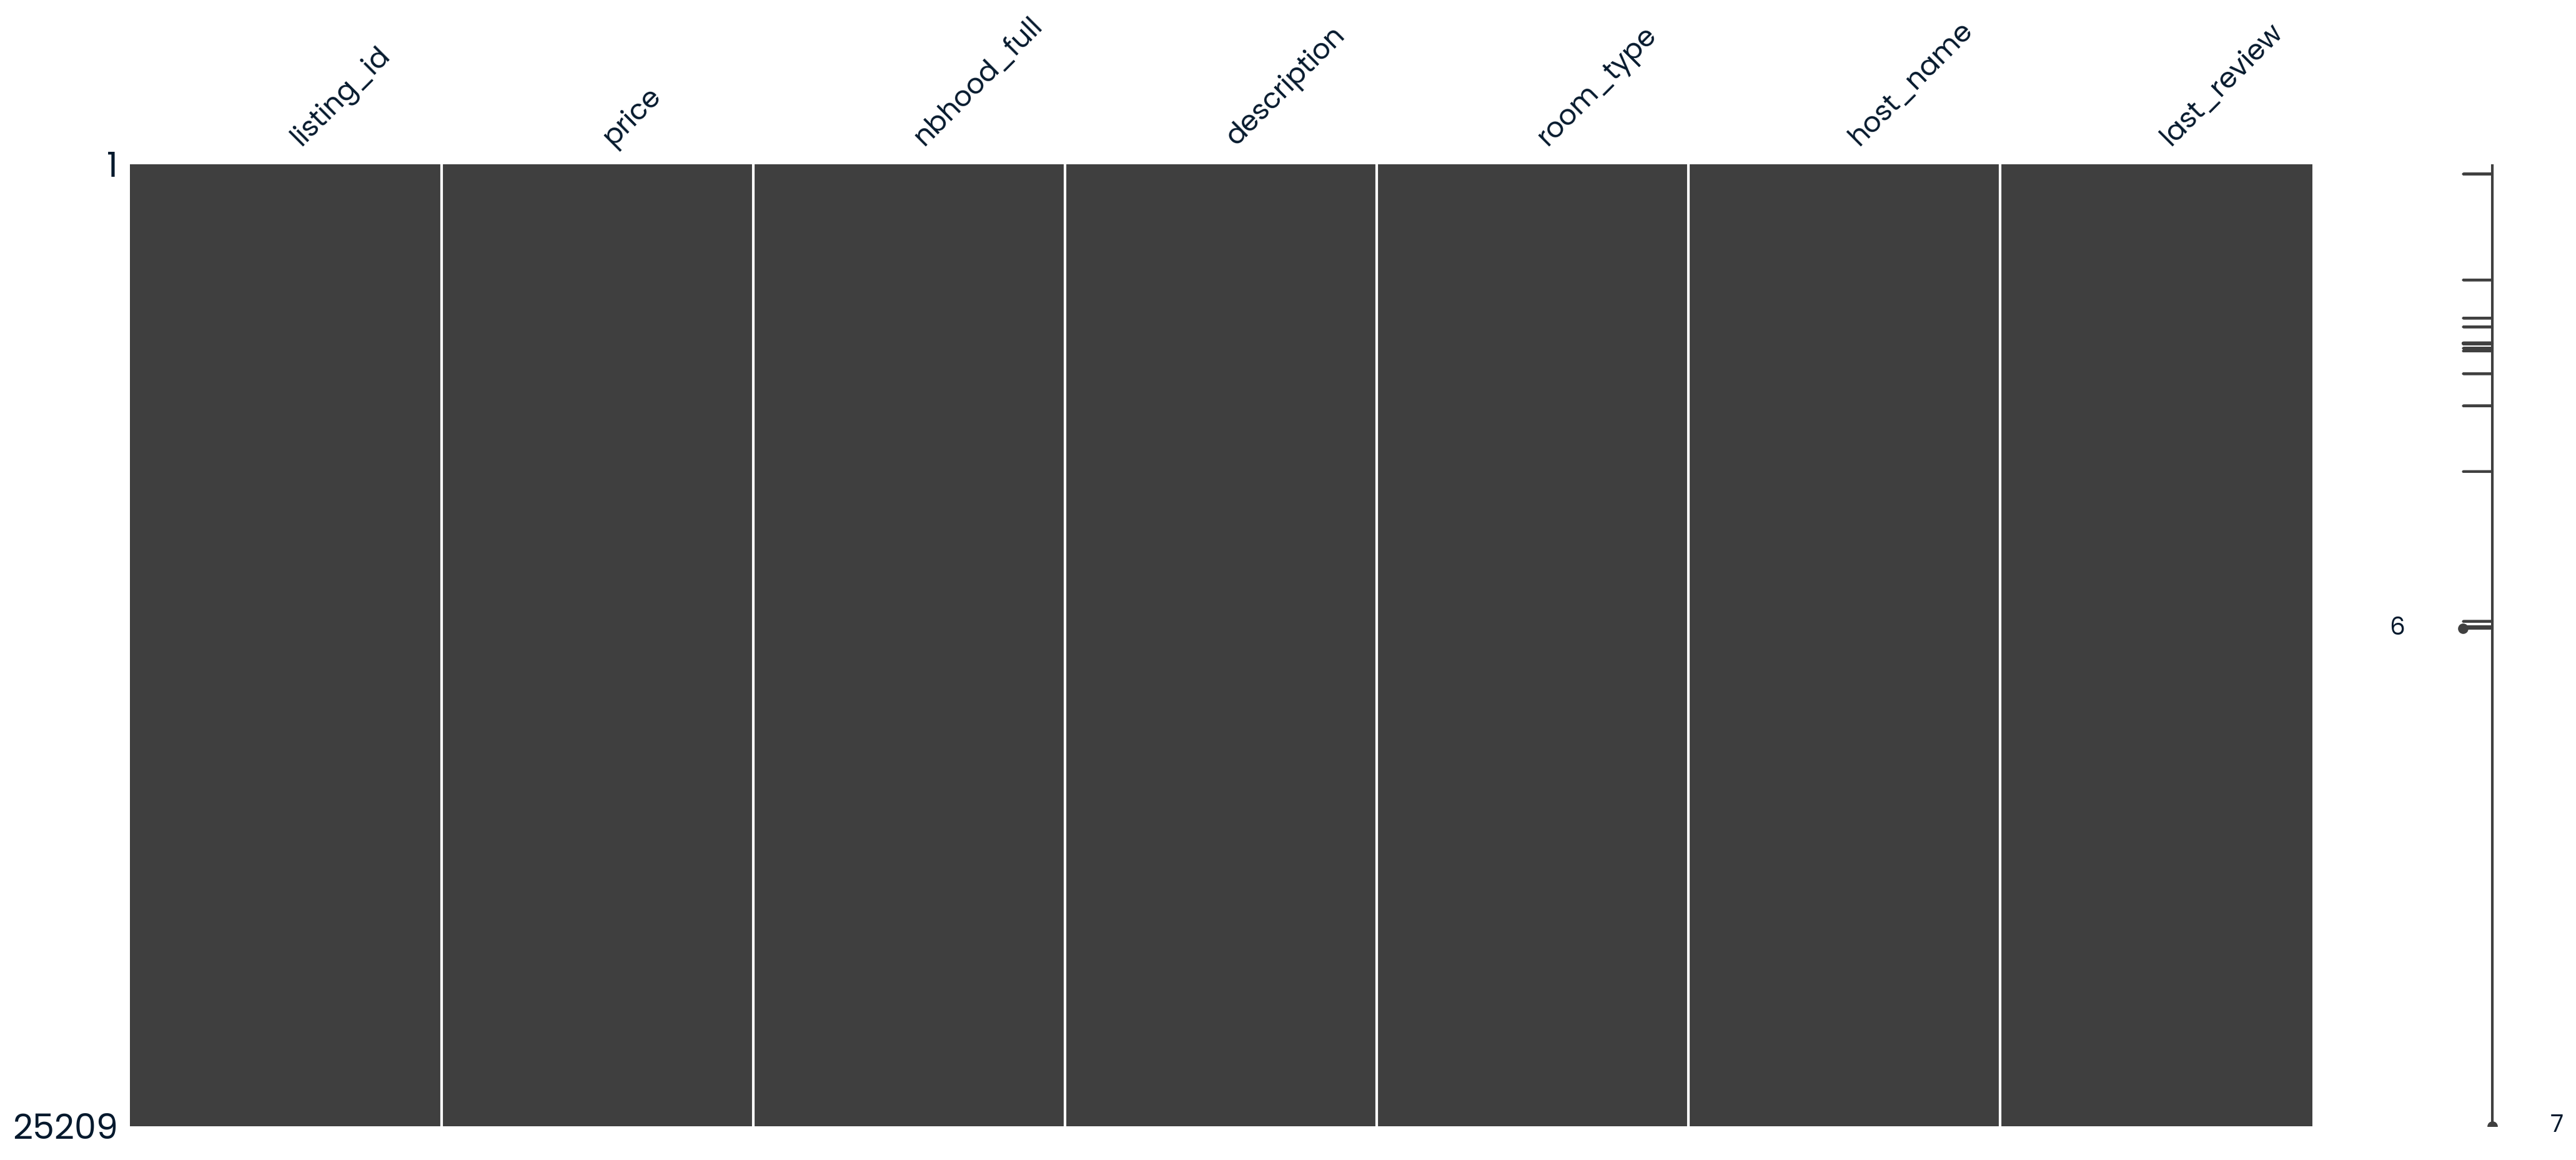

In [106]:
import missingno as msno
msno.matrix(AirBnb_2019)
plt.show()

In [107]:
AirBnb_2019.isna().sum()

listing_id      0
price           0
nbhood_full     0
description    10
room_type       0
host_name       8
last_review     0
dtype: int64

In [108]:
# Remove 'dollar' from the price column
AirBnb_2019['price'] = AirBnb_2019['price'].str.strip(' dollars')
AirBnb_2019['price'] = AirBnb_2019['price'].astype('int')

In [109]:
assert AirBnb_2019['price'].dtype == 'int'

In [110]:
# create 2 new columns for Brough and Neighborhood

AirBnb_2019[['Borough','Neighborhood']] = AirBnb_2019['nbhood_full'].str.split(",", n=1, expand= True)

In [111]:
# drop the 'nbhood_full' column
AirBnb_2019.drop(columns=['nbhood_full'], inplace=True)

In [112]:
# print value count and check the number of unique values in the 'room_type' column
print(AirBnb_2019['room_type'].unique())
AirBnb_2019['room_type'].value_counts()

['Entire home/apt' 'private room' 'Private room' 'entire home/apt'
 'PRIVATE ROOM' 'shared room' 'ENTIRE HOME/APT' 'Shared room'
 'SHARED ROOM']


Entire home/apt    8458
Private room       7241
entire home/apt    2665
private room       2248
ENTIRE HOME/APT    2143
PRIVATE ROOM       1867
Shared room         380
shared room         110
SHARED ROOM          97
Name: room_type, dtype: int64

In [113]:
AirBnb_2019['room_type'] = AirBnb_2019['room_type'].str.title()
AirBnb_2019['room_type'].value_counts()

Entire Home/Apt    13266
Private Room       11356
Shared Room          587
Name: room_type, dtype: int64

In [114]:
AirBnb_2019['room_type'] = AirBnb_2019['room_type'].astype('category')

In [115]:
# converting the 'last_review' cloumn to a pandas time-date
AirBnb_2019['last_review'] = pd.to_datetime(AirBnb_2019['last_review'], infer_datetime_format= True, errors= 'coerce')

In [116]:
# get rid of all the timeedate
#AirBnb_2019['last_review'] = AirBnb_2019['last_review'].dt.strftime('%d-%m-%Y')

## What are the dates of the earliest and most recent reviews? Store these values as two separate variables with your preferred names.

In [117]:
earliest_review = AirBnb_2019['last_review'].min()

most_recent_review = AirBnb_2019['last_review'].max()

print(earliest_review, most_recent_review)

2019-01-01 00:00:00 2019-07-09 00:00:00


**DataCamp**

In [118]:
# What are the dates of the earliest and most recent reviews?
# To use a function like max()/min() on last_review date column, it needs to be converted to datetime type
listings['last_review_date'] = pd.to_datetime(listings['last_review'], format='%B %d %Y')
first_reviewed = listings['last_review_date'].min()
last_reviewed = listings['last_review_date'].max()

## How many of the listings are private rooms? Save this into any variable.

In [119]:
private_rooms = AirBnb_2019[AirBnb_2019['room_type']=='Private Room'].value_counts()

In [120]:
nb_of_pvt_room = private_rooms.shape[0]

**DataCamp**

In [121]:
# How many of the listings are private rooms?
# Since there are differences in capitalization, make capitalization consistent
listings['room_type'] = listings['room_type'].str.lower()
private_room_count = listings[listings['room_type'] == 'private room'].shape[0]
print(private_room_count)

11356


## What is the average listing price? Round to the nearest two decimal places and save into a variable.

In [122]:
average_listing_price = AirBnb_2019['price'].mean()

**DataCamp**

In [123]:

# What is the average listing price?
# To convert price to numeric, remove " dollars" from each value
listings['price_clean'] = listings['price'].str.replace(' dollars', '').astype(float)
avg_price = listings['price_clean'].mean()

## Combine the new variables into one DataFrame called review_dates with four columns in the following order: _first_reviewed_, _last_reviewed_, _nb_private_rooms_, and _avg_price_. The DataFrame should only contain one row of values.

In [124]:
new = {'first_reviewed': [earliest_review], 'last_reviewed': [most_recent_review], 'nb_private_rooms': [nb_of_pvt_room], 'avg_price': [average_listing_price]}

review_dates = pd.DataFrame(new)

In [125]:
review_dates

first_reviewed last_reviewed  nb_private_rooms   avg_price
0     2019-01-01    2019-07-09             11342  141.777936

**DataCamp**

In [126]:
review_dates = pd.DataFrame({
    'first_reviewed': [first_reviewed],
    'last_reviewed': [last_reviewed],
    'nb_private_rooms': [private_room_count],
    'avg_price': [round(avg_price, 2)]
})

print(review_dates)


  first_reviewed last_reviewed  nb_private_rooms  avg_price
0     2019-01-01    2019-07-09             11356     141.78
